# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'2.0.3'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244913 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [8]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'])
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479487 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [9]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [10]:
len(movies)

244914

### List all Batman movies ever made

In [11]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [24]:
#there are null values in this df
null_movies_index = movies.loc[movies['title'].isna()].index
movies.iloc[null_movies_index]

,title,year


In [23]:
#remove the row where title = NaN
movies.dropna(subset=['title'], inplace=True)

In [28]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [27]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [29]:
harrypotter_df = movies[movies.title.str.contains('Harry Potter', case=False)]
harrypotter_df.sort_values(by=['year'], ascending=False)
print('Total Harry Potter Movies:', len(harrypotter_df))
harrypotter_df.head(10)

Total Harry Potter Movies: 8


,title,year
50581,Harry Potter and the Order of the Phoenix,2007
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
109213,Harry Potter and the Half-Blood Prince,2009
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
187926,Harry Potter and the Goblet of Fire,2005
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [30]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [31]:
len(movies[movies.year == 2015])

8701

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [34]:
len(movies[(movies.year >= 20) & (movies.year <= 2018)])

243512

### Section I - Q4: How many movies are titled "Hamlet"?

In [37]:
len(movies[movies.title == 'Hamlet'])

20

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [40]:
hamlet_df = (movies[(movies.title == 'Hamlet') & (movies.year >= 2000)]).sort_values(by=['year'], ascending=True)
hamlet_df

,title,year
55639,Hamlet,2000
1931,Hamlet,2009
227953,Hamlet,2011
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016
244747,Hamlet,2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [44]:
len(cast[(cast.title == 'Inception') & (cast.n.isna())])

27

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [48]:
len(cast[(cast.title == 'Inception') & (cast.n.notna())])

51

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [60]:
cast[(cast.title == 'Inception') & (cast.n.notna())].sort_values(by=['n'], ascending=True).iloc[:10]

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [59]:
# (A) List all movies where there was a character 'Albus Dumbledore'
cast[(cast.character == 'Albus Dumbledore')]

,title,year,name,type,character,n
704984,Epic Movie,2007,Dane Farwell,actor,Albus Dumbledore,17.0
792421,Harry Potter and the Goblet of Fire,2005,Michael Gambon,actor,Albus Dumbledore,37.0
792423,Harry Potter and the Order of the Phoenix,2007,Michael Gambon,actor,Albus Dumbledore,36.0
792424,Harry Potter and the Prisoner of Azkaban,2004,Michael Gambon,actor,Albus Dumbledore,27.0
947789,Harry Potter and the Chamber of Secrets,2002,Richard Harris,actor,Albus Dumbledore,32.0
947790,Harry Potter and the Sorcerer's Stone,2001,Richard Harris,actor,Albus Dumbledore,1.0
1685537,Ultimate Hero Project,2013,George (X) O'Connor,actor,Albus Dumbledore,NaN
2248085,Potter,2015,Timothy Tedmanson,actor,Albus Dumbledore,NaN


In [70]:
# (B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
dumbledore_actors = cast[cast.character == 'Albus Dumbledore']
unique_dumbledore_actors = dumbledore_actors.drop_duplicates(subset='name')
unique_dumbledore_actors[['name']]

,name
704984,Dane Farwell
792421,Michael Gambon
947789,Richard Harris
1685537,George (X) O'Connor
2248085,Timothy Tedmanson


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [73]:
# (A) How many roles has 'Keanu Reeves' played throughout his career?
total = len(cast[(cast.name.str.contains('Keanu', case=False)) & (cast.name.str.contains('Reeves', case=False))])
print(f'Keanu Reeves has played in {total} movies')

Keanu Reeves has played in 62 movies


In [74]:
# (B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.
(cast[(cast.name.str.contains('Keanu', case=False)) & (cast.name.str.contains('Reeves', case=False)) & (cast.n == 1) & (cast.year >= 1999)]).sort_values(by=['year'], ascending=True)

,title,year,name,type,character,n
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892348,Constantine,2005,Keanu Reeves,actor,John Constantine,1.0
1892388,The Lake House,2006,Keanu Reeves,actor,Alex Wyler,1.0
1892382,Street Kings,2008,Keanu Reeves,actor,Detective Tom Ludlow,1.0
1892385,The Day the Earth Stood Still,2008,Keanu Reeves,actor,Klaatu,1.0
1892359,Henry's Crime,2010,Keanu Reeves,actor,Henry Torne,1.0
1892342,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [98]:
# (A) List the total number of actor and actress roles available from 1950 - 1960
start = 1950
end = 1960
filtered_cast = cast[(cast['year'] >= start) & (cast['year'] <= end)]
roles_count = filtered_cast.groupby('type')['n'].count()
print(f"Number of Actor roles between {start} and {end}: {roles_count['actor']}")
print(f"Number of Actress roles between {start} and {end}: {roles_count['actress']}")

Number of Actor roles between 1950 and 1960: 90447
Number of Actress roles between 1950 and 1960: 39761


In [99]:
# (B) List the total number of actor and actress roles available from 2007 - 2017
start = 2007
end = 2017
filtered_cast = cast[(cast['year'] >= start) & (cast['year'] <= end)]
roles_count = filtered_cast.groupby('type')['n'].count()
print(f"Number of Actor roles between {start} and {end}: {roles_count['actor']}")
print(f"Number of Actress roles between {start} and {end}: {roles_count['actress']}")

Number of Actor roles between 2007 and 2017: 465728
Number of Actress roles between 2007 and 2017: 270635


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [107]:
# (A) List the total number of leading roles available from 2000 to present
print(f"Total number of leading roles available from 2000 to present: {len(cast[(cast.year >= 2000) & (cast.n == 1)])}")

Total number of leading roles available from 2000 to present: 60568


In [110]:
# (B) List the total number of non-leading roles available from 2000 - present (exclude support cast)
print(f"Total number of non-leading roles available from 2000 to present: {len(cast[(cast.year >= 2000) & (cast.n > 1) & (cast.n.notna())])}")

Total number of leading roles available from 2000 to present: 1001710


In [111]:
# (C) List the total number of support\extra-credit roles available from 2000 - present
print(f"Total number of support roles available from 2000 to present: {len(cast[(cast.year >= 2000) & (cast.n.isna())])}")

Total number of support roles available from 2000 to present: 887484


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [112]:
top_ten = movies.title.value_counts()[:10]
top_ten

title
Hamlet                  20
Carmen                  17
Macbeth                 16
Temptation              12
The Outsider            12
Maya                    12
The Three Musketeers    11
Othello                 11
Freedom                 11
Honeymoon               11
Name: count, dtype: int64

### Plot the top ten common movie names of all time

<Axes: ylabel='title'>

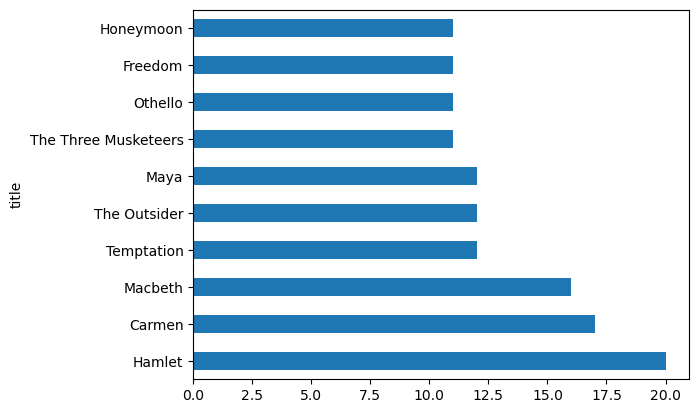

In [113]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [119]:
# Filter the DataFrame for the years in the 2000s
filtered_years = release_dates[(release_dates['year'] >= 2000) & (release_dates['year'] <= 2009)]

# Group the filtered data by 'year' and count the number of movies released in each year
movies_per_year = filtered_years.groupby('year')['title'].count()

# Sort the results in descending order and get the top 3 years
top_years = movies_per_year.sort_values(ascending=False).head(3)

# Print the top years and their corresponding movie counts
print("Top years in the 2000s for movie releases:")
for year, count in top_years.items():
    print(f"Year: {year}, Movies Released: {count}")

Top years in the 2000s for movie releases:
Year: 2009, Movies Released: 12617
Year: 2008, Movies Released: 11854
Year: 2007, Movies Released: 11566


### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

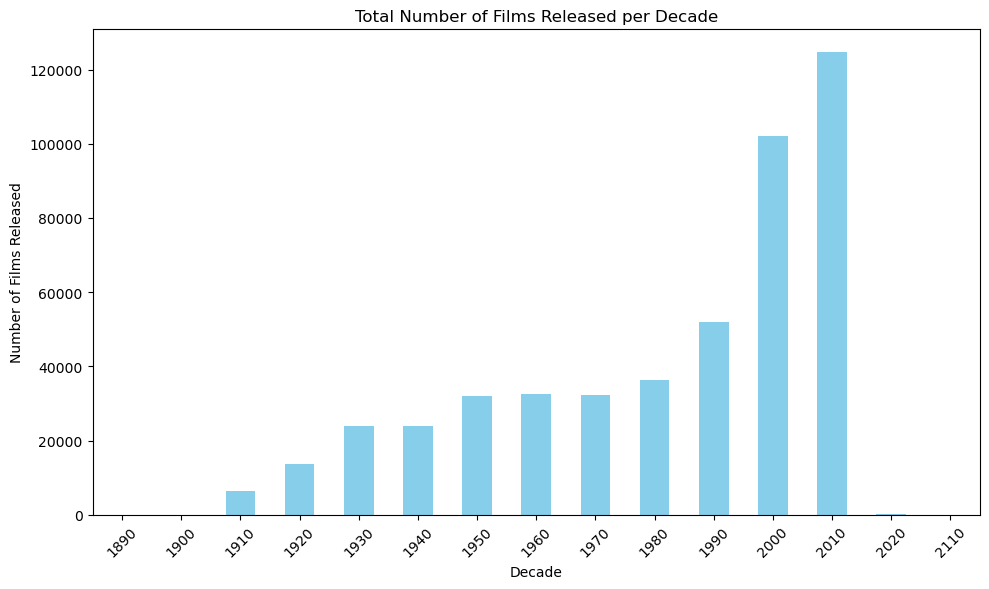

In [120]:
# Extract the decade from the 'year' column
release_dates['decade'] = (release_dates['year'] // 10) * 10

# Group the data by decade and count the number of films released in each decade
films_per_decade = release_dates.groupby('decade')['title'].count()

# Plotting
plt.figure(figsize=(10, 6))
films_per_decade.plot(kind='bar', color='skyblue')
plt.title('Total Number of Films Released per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Films Released')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [123]:
# (A) What are the top 10 most common character names in movie history?
# Group the data by 'character' and count the occurrences
character_counts = cast['character'].value_counts()

# Get the top 10 character names
top_character_names = character_counts.head(10)

# Display the top 10 character names and their counts
print("Top 10 Most Common Character Names:")
print(top_character_names)

Top 10 Most Common Character Names:
character
Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: count, dtype: int64


In [127]:
# (B) Who are the top 10 people most often credited as "Herself" in movie history?
# Filter the DataFrame for rows with 'character' column as "Herself"
herself_roles = cast[cast['character'] == 'Herself']

# Group the data by 'name' and count the occurrences
herself_counts = herself_roles['name'].value_counts()

# Get the top 10 people credited as "Herself"
top_herself_names = herself_counts.head(10)

# Display the top 10 people and their counts
print("Top 10 People Most Often Credited as 'Herself':")
print(top_herself_names)

Top 10 People Most Often Credited as 'Herself':
name
Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
In?s J. Southern              6
Mar?a Isabel (III) Mart?n     6
Marta Berrocal                6
Sumie Sakai                   6
Name: count, dtype: int64


In [128]:
# (C) Who are the top 10 people most often credited as "Himself" in movie history?
# Filter the DataFrame for rows with 'character' column as "Himself"
himself_roles = cast[cast['character'] == 'Himself']

# Group the data by 'name' and count the occurrences
himself_counts = himself_roles['name'].value_counts()

# Get the top 10 people credited as "Himself"
top_himself_names = himself_counts.head(10)

# Display the top 10 people and their counts
print("Top 10 People Most Often Credited as 'Himself':")
print(top_himself_names)

Top 10 People Most Often Credited as 'Himself':
name
Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Ron Jeremy               22
Bill Clinton             22
Franklin D. Roosevelt    21
Name: count, dtype: int64


### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [137]:
# (A) What are the top 10 most frequent roles that start with the word "Zombie"?

word = "Zombie"
# Filter the DataFrame for rows with 'character' column starting with "Zombie"
roles = cast[cast['character'].notna() & cast['character'].str.startswith(word)]

# Group the data by 'character' and count the occurrences
counts = roles['character'].value_counts()

# Get the top 10 most frequent "Zombie" roles
top_roles = counts.head(10)

# Display the top 10 roles and their counts
print(f"Top 10 Most Frequent '{word}' Roles:")
print(top_roles)

Top 10 Most Frequent 'Zombie' Roles:
character
Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: count, dtype: int64


In [138]:
# (B) What are the top 10 most frequent roles that start with the word "Police"?

word = "Police"
# Filter the DataFrame for rows with 'character' column starting with "Zombie"
roles = cast[cast['character'].notna() & cast['character'].str.startswith(word)]

# Group the data by 'character' and count the occurrences
counts = roles['character'].value_counts()

# Get the top 10 most frequent "Zombie" roles
top_roles = counts.head(10)

# Display the top 10 roles and their counts
print(f"Top 10 Most Frequent '{word}' Roles:")
print(top_roles)

Top 10 Most Frequent 'Police' Roles:
character
Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: count, dtype: int64


### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

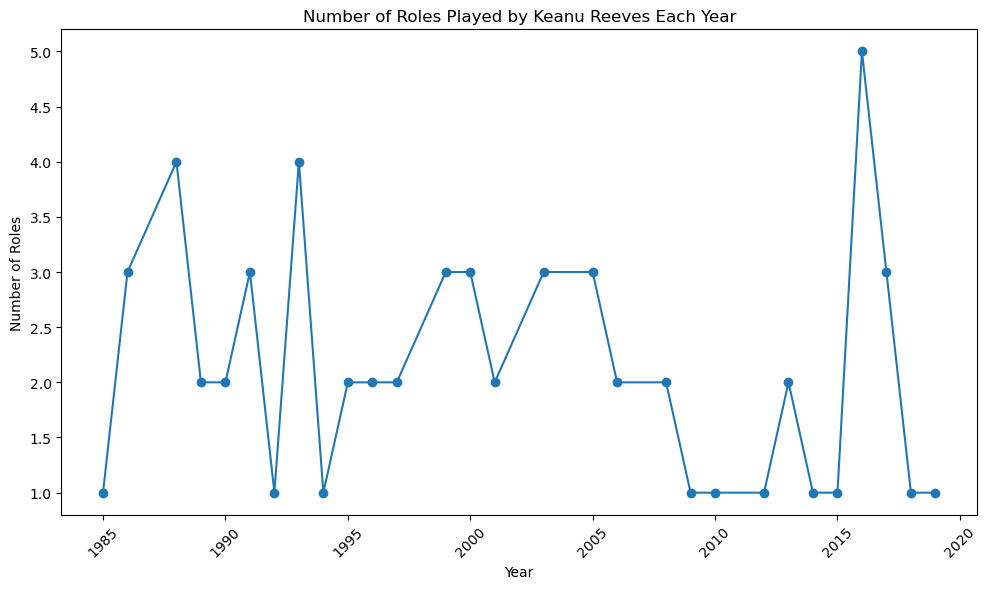

In [139]:
# Filter the DataFrame for rows where the 'name' column is 'Keanu Reeves'
keanu_roles = cast[cast['name'] == 'Keanu Reeves']

# Group the data by 'year' and count the occurrences of roles
roles_per_year = keanu_roles.groupby('year')['character'].count()

# Plotting
plt.figure(figsize=(10, 6))
roles_per_year.plot(kind='line', marker='o')
plt.title('Number of Roles Played by Keanu Reeves Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


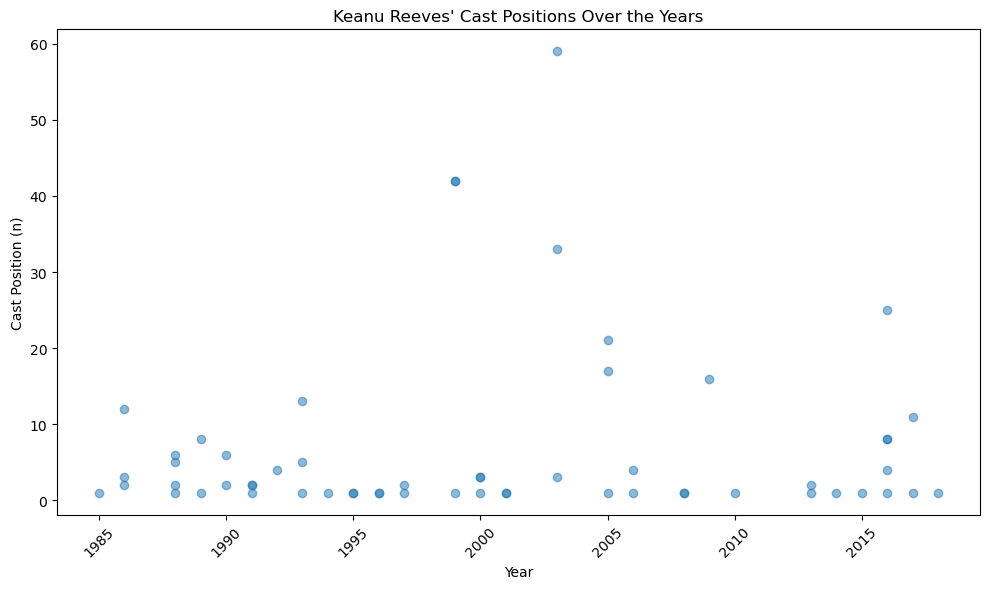

In [140]:
# Filter the DataFrame for rows where the 'name' column is 'Keanu Reeves'
keanu_roles = cast[cast['name'] == 'Keanu Reeves']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(keanu_roles['year'], keanu_roles['n'], alpha=0.5)
plt.title("Keanu Reeves' Cast Positions Over the Years")
plt.xlabel('Year')
plt.ylabel('Cast Position (n)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

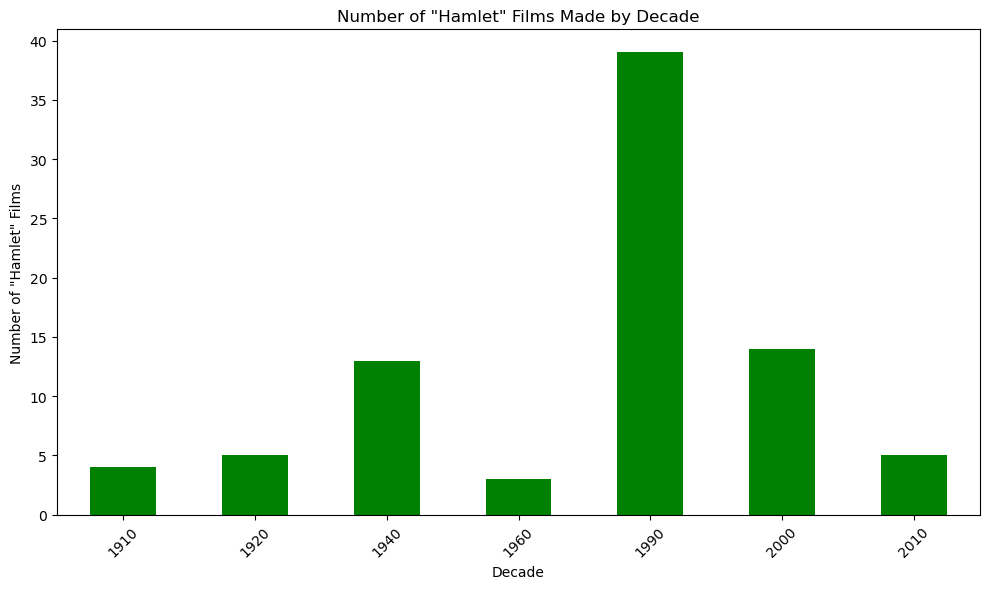

In [150]:
# Filter the DataFrame for rows where the 'title' column is "Hamlet"
hamlet_films = release_dates[release_dates['title'] == 'Hamlet']

# Extract the decade from the 'year' column
hamlet_films.loc[:, 'decade'] = (hamlet_films['year'] // 10) * 10

# Group the data by 'decade' and count the occurrences
hamlet_counts_per_decade = hamlet_films.groupby('decade')['title'].count()

# Plotting
plt.figure(figsize=(10, 6))
hamlet_counts_per_decade.plot(kind='bar', color='green')
plt.title('Number of "Hamlet" Films Made by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of "Hamlet" Films')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [153]:
# (A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

start = 1960
end = 1969
# Filter the DataFrame for years between 1960 and 1969
sixties_roles = cast[(cast['year'] >= start) & (cast['year'] <= end)]

# Filter the DataFrame further for leading roles (n = 1)
leading_roles = sixties_roles[sixties_roles['n'] == 1]

# Group the data by 'type' (actor or actress) and count the occurrences
leading_roles_count = leading_roles['type'].value_counts()

# Display the count of leading roles for actors and actresses
print("Number of Leading Roles ({start}-{end}):")
print("Actors:", leading_roles_count['actor'])
print("Actresses:", leading_roles_count['actress'])

Number of Leading Roles ({start}-{end}):
Actors: 8320
Actresses: 3503


In [154]:
# (B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?
start = 2000
end = 2009
# Filter the DataFrame for years between 1960 and 1969
sixties_roles = cast[(cast['year'] >= start) & (cast['year'] <= end)]

# Filter the DataFrame further for leading roles (n = 1)
leading_roles = sixties_roles[sixties_roles['n'] == 1]

# Group the data by 'type' (actor or actress) and count the occurrences
leading_roles_count = leading_roles['type'].value_counts()

# Display the count of leading roles for actors and actresses
print("Number of Leading Roles ({start}-{end}):")
print("Actors:", leading_roles_count['actor'])
print("Actresses:", leading_roles_count['actress'])

Number of Leading Roles ({start}-{end}):
Actors: 18557
Actresses: 7787


### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [156]:
# Filter the DataFrame for rows where the 'name' column is 'Frank Oz'
frank_oz_roles = cast[cast['name'] == 'Frank Oz']

# Group the data by 'title' and 'year', then count the roles in each film
film_role_counts = frank_oz_roles.groupby(['title', 'year'])['character'].count()

# Filter the films where Frank Oz played more than one role
films_with_multiple_roles = film_role_counts[film_role_counts > 1]

# Convert the result back to a DataFrame and reset index
films_with_multiple_roles_df = films_with_multiple_roles.reset_index()

# Order the results by year
films_with_multiple_roles_df = films_with_multiple_roles_df.sort_values('year')
films_with_multiple_roles_df.rename(columns={'character': 'rolecount'}, inplace=True)

# Display the list of films
print("Films in which Frank Oz played more than 1 role:")
print(films_with_multiple_roles_df)

Films in which Frank Oz played more than 1 role:
                                  title  year  rolecount
8                      The Muppet Movie  1979          8
0        An American Werewolf in London  1981          2
6                The Great Muppet Caper  1981          6
5                      The Dark Crystal  1982          2
9            The Muppets Take Manhattan  1984          7
1                      Follow That Bird  1985          3
7            The Muppet Christmas Carol  1992          7
2                Muppet Treasure Island  1996          4
3                    Muppets from Space  1999          4
4  The Adventures of Elmo in Grouchland  1999          3


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [160]:
# Filter the DataFrame for rows where the 'name' column is 'Frank Oz'
frank_oz_roles = cast[cast['name'] == 'Frank Oz']

# Group the data by 'character', then count the occurrences of each character
character_counts = frank_oz_roles.groupby('character')['title'].count()

# Filter characters that Frank Oz portrayed at least twice
characters_at_least_twice = character_counts[character_counts >= 2]

# Display the list of characters
print("Characters that Frank Oz has portrayed at least twice:")
print(characters_at_least_twice)

Characters that Frank Oz has portrayed at least twice:
character
Animal            6
Bert              3
Cookie Monster    5
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
Name: title, dtype: int64


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<Axes: xlabel='date'>

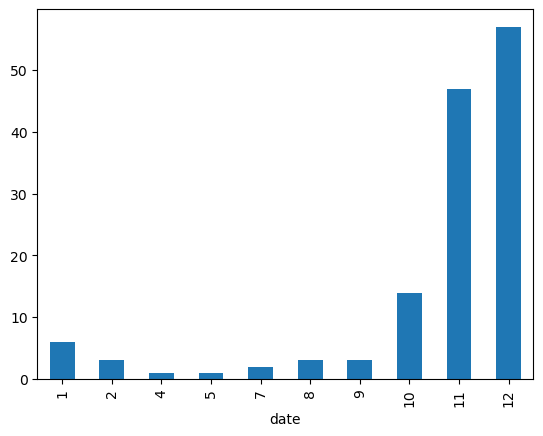

In [161]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

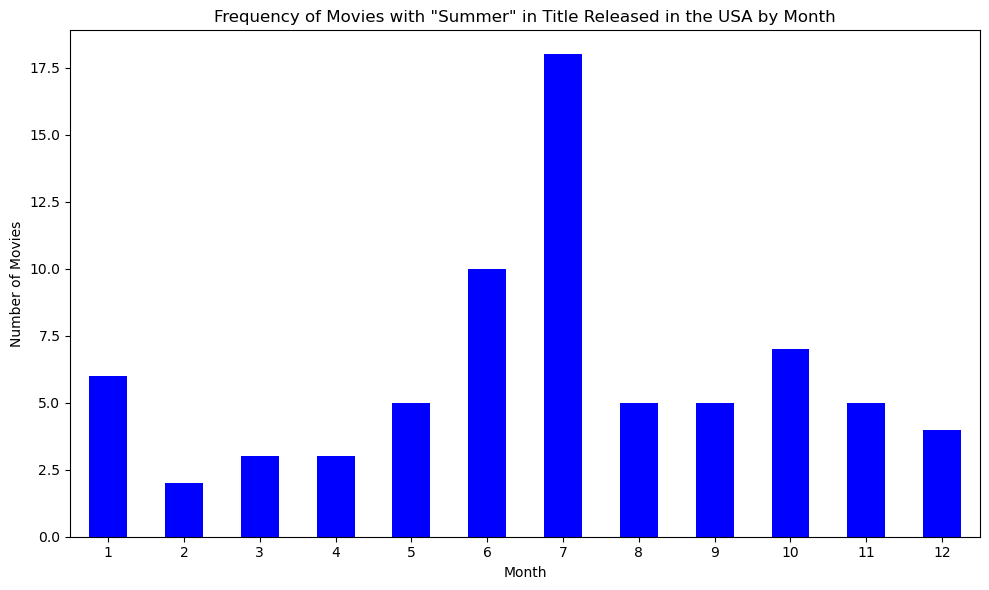

In [166]:
# Filter the DataFrame for movies with "Summer" in the title released in the USA
summer_movies_usa = release_dates[(release_dates['title'].str.contains("Summer", case=False)) & (release_dates['country'] == 'USA')]

# Extract the month from the 'date' column
#summer_movies_usa['month'] = pd.to_datetime(summer_movies_usa['date']).dt.month

summer_movies_usa = summer_movies_usa.assign(month=pd.to_datetime(summer_movies_usa['date']).dt.month)

# Group the data by month and count the occurrences
movies_per_month = summer_movies_usa.groupby('month')['title'].count()

# Plotting
plt.figure(figsize=(10, 6))
movies_per_month.plot(kind='bar', color='blue')
plt.title('Frequency of Movies with "Summer" in Title Released in the USA by Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

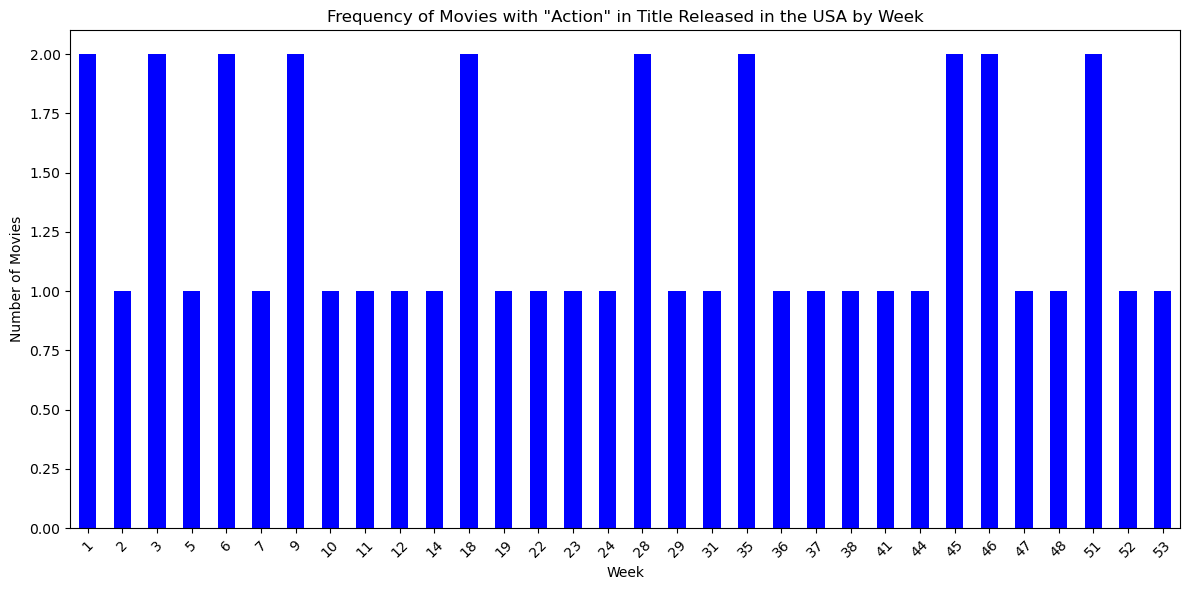

In [172]:
# Filter the DataFrame for movies with "Action" in their title released in the USA
action_movies_usa = release_dates[(release_dates['title'].str.contains("Action", case=False)) & (release_dates['country'] == 'USA')]

# Convert the 'date' column to datetime and extract the week number
action_movies_usa = action_movies_usa.assign(date=pd.to_datetime(action_movies_usa['date']))
#action_movies_usa['date'] = pd.to_datetime(action_movies_usa['date'])
action_movies_usa = action_movies_usa.assign(week=action_movies_usa['date'].dt.isocalendar().week)
#action_movies_usa['week'] = action_movies_usa['date'].dt.week

# Count the frequency of movies by week
frequency_by_week = action_movies_usa['week'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
frequency_by_week.plot(kind='bar', color='blue')
plt.title('Frequency of Movies with "Action" in Title Released in the USA by Week')
plt.xlabel('Week')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [175]:
from tabulate import tabulate
# Filter the 'cast' DataFrame for Keanu Reeves in lead roles
keanu_lead_roles = cast[(cast['name'] == 'Keanu Reeves') & (cast['n'] == 1)]

# Merge with 'release_dates' to get release dates
keanu_lead_with_dates = keanu_lead_roles.merge(release_dates, on=['title', 'year'])

# Filter for movies released in the USA
keanu_lead_usa = keanu_lead_with_dates[keanu_lead_with_dates['country'] == 'USA']

# Sort by release date
keanu_lead_usa_sorted = keanu_lead_usa.sort_values(by='date')

# Create a list of dictionaries for tabulate
table_data = []
for index, row in keanu_lead_usa_sorted.iterrows():
    release_date = row['date'].date()  # Extract the date without time
    table_data.append({'Title': row['title'], 'Release Date': release_date})

# Display the movies and their release dates in a table
table = tabulate(table_data, headers='keys', tablefmt='grid')
print(table)

+----------------------------------+----------------+
| Title                            | Release Date   |
+==================================+================+
| The Night Before                 | 1988-04-15     |
+----------------------------------+----------------+
| Bill & Ted's Excellent Adventure | 1989-02-17     |
+----------------------------------+----------------+
| Bill & Ted's Bogus Journey       | 1991-07-19     |
+----------------------------------+----------------+
| Little Buddha                    | 1994-05-25     |
+----------------------------------+----------------+
| Speed                            | 1994-06-10     |
+----------------------------------+----------------+
| Johnny Mnemonic                  | 1995-05-26     |
+----------------------------------+----------------+
| A Walk in the Clouds             | 1995-08-11     |
+----------------------------------+----------------+
| Chain Reaction                   | 1996-08-02     |
+---------------------------

### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

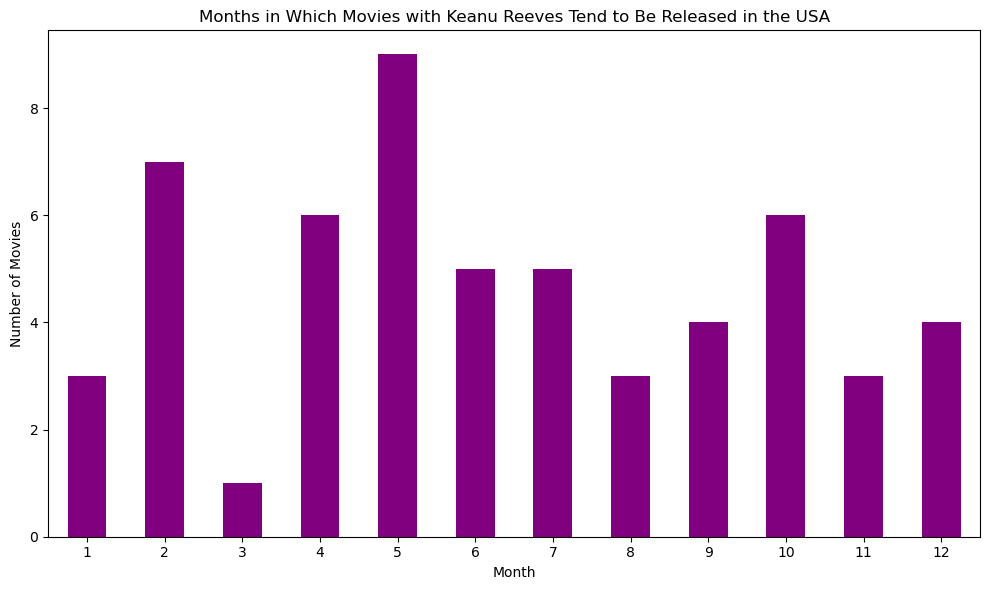

In [178]:
# Filter the 'release_dates' DataFrame for movies with Keanu Reeves in the cast released in the USA
keanu_movies_usa = release_dates[(release_dates['title'].isin(cast[cast['name'] == 'Keanu Reeves']['title'])) & (release_dates['country'] == 'USA')]

# Convert the 'date' column to datetime and extract the month
keanu_movies_usa = keanu_movies_usa.assign(date=pd.to_datetime(keanu_movies_usa['date']))
keanu_movies_usa = keanu_movies_usa.assign(month=keanu_movies_usa['date'].dt.month)
# Count the frequency of movies by month
frequency_by_month = keanu_movies_usa['month'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
frequency_by_month.plot(kind='bar', color='purple')
plt.title('Months in Which Movies with Keanu Reeves Tend to Be Released in the USA')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

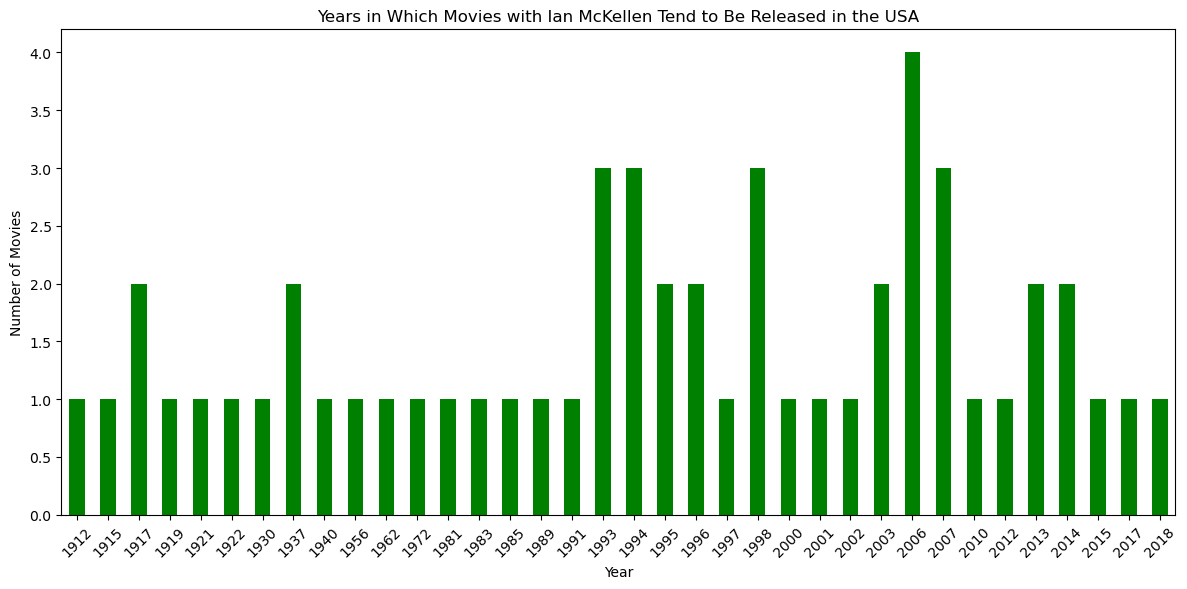

In [185]:
# Filter the 'release_dates' DataFrame for movies with Ian McKellen in the cast released in the USA
ian_movies_usa = release_dates[(release_dates['title'].isin(cast[cast['name'] == 'Ian McKellen']['title'])) & (release_dates['country'] == 'USA')]

# Convert the 'date' column to datetime and extract the year
ian_movies_usa = ian_movies_usa.assign(date=pd.to_datetime(ian_movies_usa['date'])) 
ian_movies_usa = ian_movies_usa.assign(year=ian_movies_usa['date'].dt.year)

# Count the frequency of movies by year
frequency_by_year = ian_movies_usa['year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
frequency_by_year.plot(kind='bar', color='green')
plt.title('Years in Which Movies with Ian McKellen Tend to Be Released in the USA')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()